# Is NVIDIA's Stock a Bubble? A data driven analysis

In [43]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Dataset loading
file_path = "/Users/radhikauppanapalli/Downloads/NVDAStocks25.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2019-10-23,4.853308,NaN,4.891500,4.775750,4.807750,279916000.0
2024-08-13,116.122063,116.139999,116.230003,111.580002,112.440002,312646700.0
2016-06-02,1.157369,1.178500,1.188500,1.165000,1.176500,329208000.0
2023-12-01,NaN,46.764999,47.200001,46.187000,46.525002,369317000.0
2022-08-16,18.854853,18.879000,19.142000,18.500999,18.920000,451240000.0


In [45]:
# Check for duplicates
duplicates = df.index.duplicated(keep=False)
if duplicates.any():
    print("Duplicate dates found:")
    print(df.index[duplicates])
    df = df[~duplicates]  # Removing duplicate rows
    print("Duplicate entries removed.")
else:
    print("No duplicate dates found.")

Duplicate dates found:
DatetimeIndex(['2023-12-01', '2024-08-05', '2023-01-12', '2020-06-03',
               '2019-12-04', '2020-08-19', '2019-12-04', '2020-07-22',
               '2019-05-08', '2020-01-29',
               ...
               '2020-03-09', '2022-08-23', '2024-04-23', '2019-10-02',
               '2016-12-30', '2024-10-16', '2020-02-20', '2019-01-29',
               '2020-11-20', '2020-01-09'],
              dtype='datetime64[ns]', name='Date', length=166, freq=None)
Duplicate entries removed.


In [46]:
# Handling missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

df = df.dropna()  # Removing rows with missing values
print("Missing values removed.")


Missing values before cleaning:
Adj Close    119
Close        148
High          99
Low           83
Open          92
Volume       165
dtype: int64
Missing values removed.


In [47]:
# Checking for duplicate columns
df = df.loc[:, ~df.columns.duplicated()]
print("Duplicate columns, if any, have been removed.")


Duplicate columns, if any, have been removed.


In [48]:
# Converting data types to be sure
df = df.astype({
    'Adj Close': 'float64',
    'Close': 'float64',
    'High': 'float64',
    'Low': 'float64',
    'Open': 'float64',
    'Volume': 'int64'
})
print("Data types standardized.")

Data types standardized.


In [49]:
# Saving cleaned data to a new file for further analysis and forecasting
cleaned_file_path = "/Users/radhikauppanapalli/Downloads/NVDAStocks25_CLEANED.csv"
df.to_csv(cleaned_file_path)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: /Users/radhikauppanapalli/Downloads/NVDAStocks25_CLEANED.csv


In [50]:

# Display cleaned dataset
print("\nCleaned Dataset Preview:")
print(df.info())
print(df.head())


Cleaned Dataset Preview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1483 entries, 2024-08-13 to 2024-09-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1483 non-null   float64
 1   Close      1483 non-null   float64
 2   High       1483 non-null   float64
 3   Low        1483 non-null   float64
 4   Open       1483 non-null   float64
 5   Volume     1483 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 81.1 KB
None
             Adj Close       Close        High         Low        Open  \
Date                                                                     
2024-08-13  116.122063  116.139999  116.230003  111.580002  112.440002   
2016-06-02    1.157369    1.178500    1.188500    1.165000    1.176500   
2022-08-16   18.854853   18.879000   19.142000   18.500999   18.920000   
2020-05-26    8.686546    8.717750    9.181750    8.672000    9.156750   
2018-02-08    5.379222    5.43

In [51]:
# Reloading the cleaned data for integrity
cleaned_file_path = "/Users/radhikauppanapalli/Downloads/NVDAStocks25_CLEANED.csv"
df = pd.read_csv(cleaned_file_path, parse_dates=['Date'], index_col='Date')

In [52]:
#sorting by date
df = df.sort_index()

In [53]:
# Check for null values after cleaning
df = df.dropna()

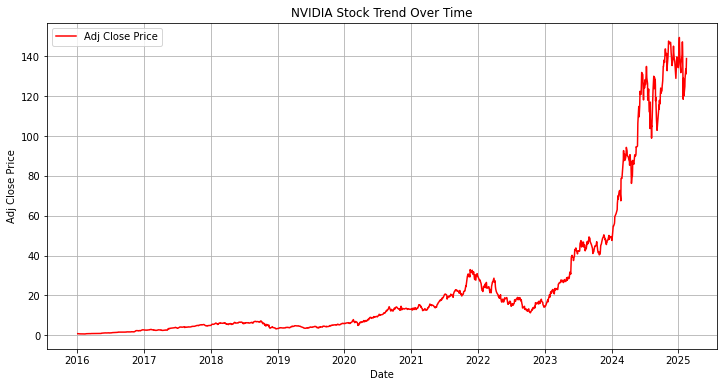

In [54]:
# Stock Trend Over Time (Visualizing Adjusted Close Price Over Time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Adj Close', label='Adj Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('NVIDIA Stock Trend Over Time')
plt.grid(True)
plt.show()


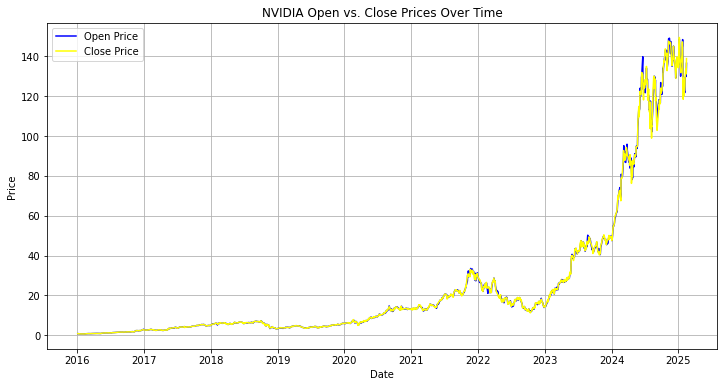

In [55]:
# Comparing Open and Close Prices Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Open', label='Open Price', color='blue')
sns.lineplot(data=df, x=df.index, y='Close', label='Close Price', color='yellow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVIDIA Open vs. Close Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Compute daily returns for volatility analysis
df['Daily Return'] = df['Adj Close'].pct_change()

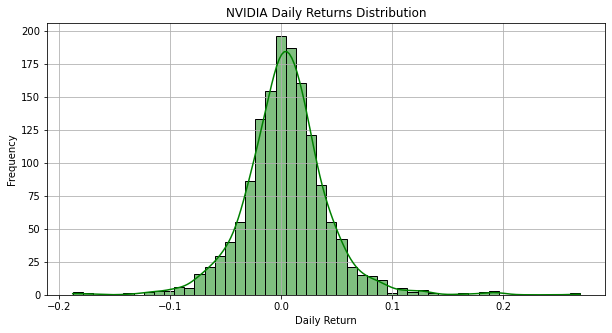

In [57]:
# Volatility Analysis - Histogram of Daily Returns 
#(volatility is how much and how often the price of a stock (or any financial asset) fluctuates over time.)
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='green')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('NVIDIA Daily Returns Distribution')
plt.grid(True)
plt.show()

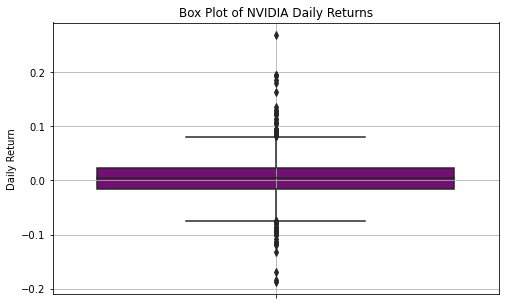

In [58]:
# Plot for Daily Returns (box plot to see outliers and data spread)
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Daily Return'].dropna(), color='purple')
plt.title('Box Plot of NVIDIA Daily Returns')
plt.grid(True)
plt.show()

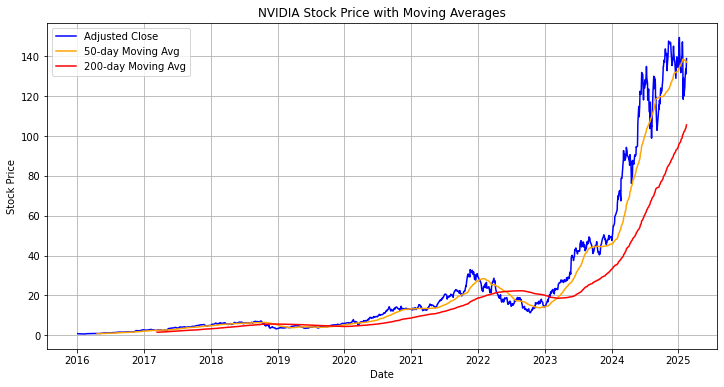

In [61]:
# Forecasting the Simple Moving Averages (SMA)
# SMA smooths short-term fluctuations and highlights long-term trends
df['50-day MA'] = df['Adj Close'].rolling(window=50).mean()
df['200-day MA'] = df['Adj Close'].rolling(window=200).mean()

# Visualizing the stock price along with moving averages
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Adj Close', label='Adjusted Close', color='blue')
sns.lineplot(data=df, x=df.index, y='50-day MA', label='50-day Moving Avg', color='orange')
sns.lineplot(data=df, x=df.index, y='200-day MA', label='200-day Moving Avg', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('NVIDIA Stock Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()
